In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df_procesed = pd.read_csv('data/procesed/modified-spotify-data.csv')
df_procesed.shape

(89740, 157)

In [37]:
from sklearn.model_selection import train_test_split

X_linear_reg = df_procesed.drop(columns=['popularity'])
y_linear_reg = df_procesed[['popularity']]

# Train test split 
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X_linear_reg, y_linear_reg, test_size=0.2, random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear_model = LinearRegression()
    
linear_mdl = LinearRegression()
linear_mdl.fit(X_train_lm, y_train_lm)

# calculate the predict the model
y_pred_lm = linear_mdl.predict(X_test_lm)

# See the score
print(f"{'--'*15}  Scores  {'--'*15}")
print(f"R^2 Score : {r2_score(y_test_lm, y_pred_lm)} ")
print(f"MAE : {mean_absolute_error(y_test_lm, y_pred_lm)} ")
print(f"RMAE : {np.sqrt(mean_absolute_error(y_test_lm, y_pred_lm))}")
print(f"{'--'*30}  \n")

------------------------------  Scores  ------------------------------
R^2 Score : 0.9875651446549487 
MAE : 0.07470397649945391 
RMAE : 0.27332028190285096
------------------------------------------------------------  



In [39]:
def plot_learning_curves(model, X, y, val_size=0.2, method='r2_score', figsize=(10,10), step=1):
        
    train_error = []
    validation_error = []
    sizes = []

    # Fix 1: Use test_size instead of train_size for validation split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=42)

    # Fix 2: Move plt.figure outside the loop
    plt.figure(figsize=figsize)

    for m in range(2, 2000,10):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        
        if method == 'r2_score':
            train_error.append(r2_score(y_train[:m], y_train_pred))
            validation_error.append(r2_score(y_val, y_val_pred))
        elif method == 'mean_squared_error':
            train_error.append(mean_squared_error(y_train[:m], y_train_pred))
            validation_error.append(mean_squared_error(y_val, y_val_pred))
        elif method == 'mean_absolute_error':
            train_error.append(mean_absolute_error(y_train[:m], y_train_pred))
            validation_error.append(mean_absolute_error(y_val, y_val_pred))
        else:
            train_error.append(r2_score(y_train[:m], y_train_pred))
            validation_error.append(r2_score(y_val, y_val_pred))
        #print(f'loop {m}')
        sizes.append(m)
        
    plt.figure(figsize=figsize)
    plt.plot(sizes, train_error, color='r', label='train curve')
    plt.plot(sizes, validation_error, color='b', label='validation curve')
    plt.xlabel('training size')
    plt.ylabel(f' {method} ')
    plt.legend()
    plt.title(f'{model}')
    plt.grid(True)
    #return train_error, validation_error


<Figure size 1000x1000 with 0 Axes>

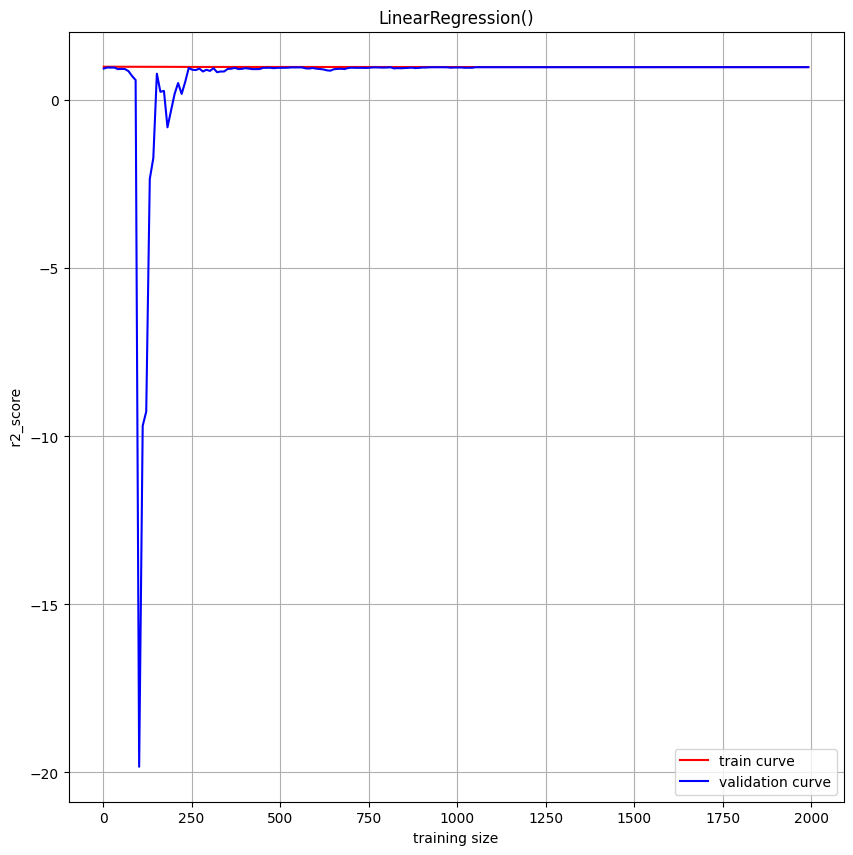

In [40]:
plot_learning_curves(linear_mdl, X_train_lm, y_train_lm, step=500)

<Figure size 1000x1000 with 0 Axes>

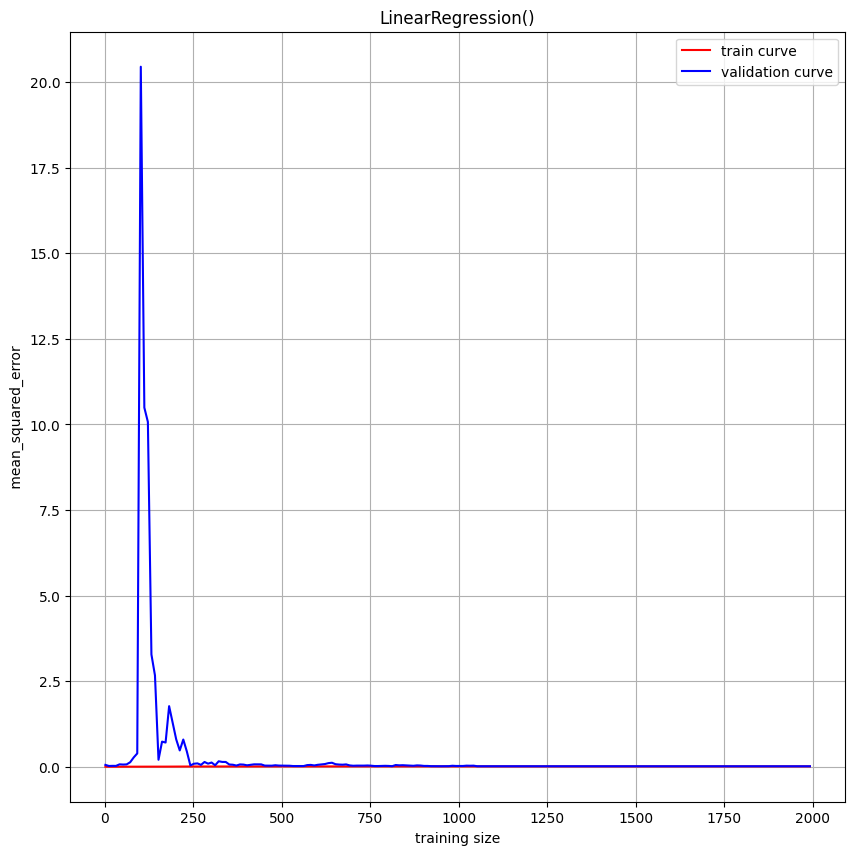

In [41]:
plot_learning_curves(linear_mdl, X_train_lm, y_train_lm, step=500, method='mean_squared_error')

<Figure size 1000x1000 with 0 Axes>

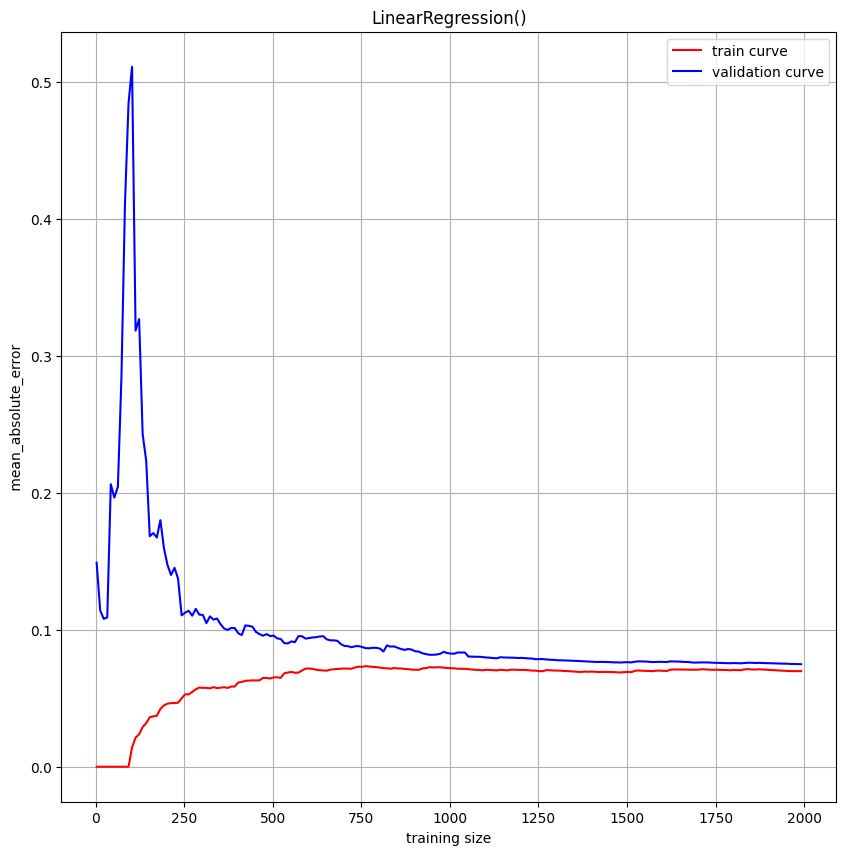

In [42]:
plot_learning_curves(linear_mdl, X_train_lm, y_train_lm, step=500, method='mean_absolute_error')

In [43]:
#train_error = []
#validation_error = []

#X_train_curv, X_val_curv, y_train_curv, y_val_curv = train_test_split(X_train_lm, y_train_lm, test_size=0.2, random_state=42)

#plt.figure(figsize=figsize)

#for m in range(2, len(X_train_curv)):
#    linear_mdl.fit(X_train_curv[:m], y_train[:m])
#    y_train_pred = linear_mdl.predict(X_train[:m])
#    y_val_pred = model.predict(X_val)
    
#    train_error.append(r2_score(y_train[:m], y_train_pred))
#    validation_error.append(r2_score(y_val, y_val_pred))
    
    #    elif method == 'mean_squared_error':
    #        train_error.append(mean_squared_error(y_train[:m], y_train_pred))
    #        validation_error.append(mean_squared_error(y_val, y_val_pred))
    #    elif method == 'mean_absolute_error':
    #        train_error.append(mean_absolute_error(y_train[:m], y_train_pred))
    #        validation_error.append(mean_absolute_error(y_val, y_val_pred))
    #    else:
    #        train_error.append(r2_score(y_train[:m], y_train_pred))
    #        validation_error.append(r2_score(y_val, y_val_pred))
    #   
    #   return train_error, validation_error

In [44]:
#from sklearn.tree import DecisionTreeRegressor

#spotify_tree_clf = DecisionTreeRegressor(max_depth=20)

#spotify_tree_clf.fit(X_train, y_train)


In [45]:
#from sklearn.metrics import r2_score

#y_pred_tree = spotify_tree_clf.predict(X_train)
#print(r2_score(y_train, y_pred_tree)) 

In [46]:
#y_pred_tree_test = spotify_tree_clf.predict(X_test)
#print(r2_score(y_test, y_pred_tree_test)) 